In [48]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Discretización de un sistema LTI de segundo orden

A continuación se configuran los parámetros del sistema de tiempo continuo y su función de transferencia

In [49]:
# parámetros del sistema
m = 30
b = 20
k = 50

# Constantes de F. de transferencia
b1 = b/m
a1 = b1
b2 = k/m
a2 = b2
num = [b1, b2]
den = [1, b1, b2]

# F. de transferencia
sys_s = signal.lti(num,den)

Ahora se obtendrá el sistema en tiempo discreto correspondiente mediante el uso de la aproximacion por diferencias finitas

In [50]:
# Periodo de muestreo
Ts = 0.1

# Parámetros
B1=-b1/Ts
B2=(b1/Ts)+b2
A0=1.0/Ts**2.0
A1=-(2.0/Ts**2.0)-(a1/Ts)
A2=(1.0/Ts**2.0)+(a1/Ts)+a2
#numerador y denominador
numd = [B2, B1, 0.0]
dend = [A2, A1, A0]

# F. de transferencia
sys_z = signal.dlti(numd,dend,dt=Ts)

Graficar las respuestas al escalón unitario de ambas representaciones

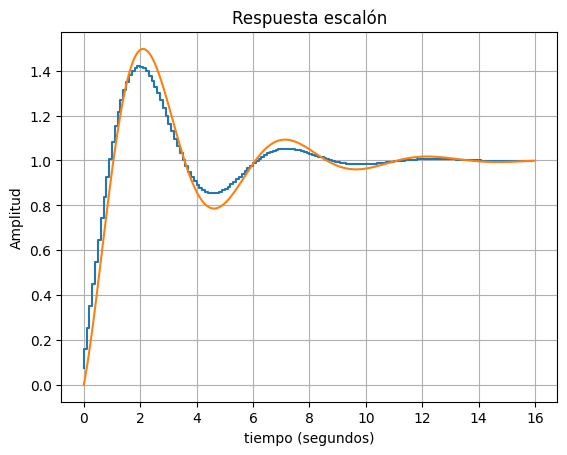

In [51]:
Tfin = 16.0 #segundos

nTs = np.arange(0,Tfin,Ts)
t = np.arange(0,Tfin,Ts*0.1)
n, yd = signal.dstep(sys_z, n=len(nTs))
t, yc = signal.step(sys_s, T=t)

plt.figure(1)
plt.step(n,np.squeeze(yd))
plt.plot(t,yc)
plt.title("Respuesta escalón") 
plt.xlabel("tiempo (segundos)") 
plt.ylabel("Amplitud") 
plt.grid()
plt.show()